In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision

from diffusers.models import AutoencoderKL

from tinyimagenet import TinyImageNet

c:\Users\ptima\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\ptima\anaconda3\Lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\ptima\anaconda3\Lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [3]:
if(torch.cuda.is_available()):
    print("Using CUDA")
    device = torch.device('cuda')
else:
    print("Using CPU")
    device = torch.device('cpu')

# set seeds for reproducibility
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)

Using CUDA


In [4]:
# TinyImageNet

dataset = TinyImageNet('./data/tiny-imagenet-200', 'train')
data = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [24]:
# https://huggingface.co/stabilityai/sd-vae-ft-mse
model: AutoencoderKL = AutoencoderKL.from_pretrained('stabilityai/sd-vae-ft-mse').to(device)

print(sum(p.numel() for p in model.parameters()))

# model = torch.compile(model) TODO we should do this on linux for optimization

scale_factor=0.18215 # scale_factor follows DiT and stable diffusion.

def encode(x):
    encoder_posterior = model.encode(x)
    z = encoder_posterior.sample().to(device)
    return z * scale_factor

def decode(z):
    z = z / scale_factor
    x = model.decode(z).sample
    return x

83653863


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


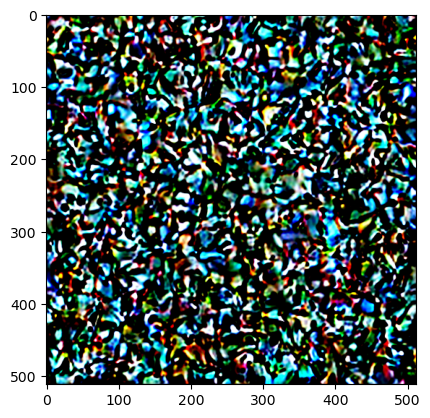

In [26]:

# Visualize the generated samples

z = torch.randn(1, 4, 64, 64).to(device)
x = decode(z)
x = x.detach().cpu().numpy()

plt.imshow(x[0].transpose(1, 2, 0))

# No 
plt.show()

